# Project3 
### Xichen Li, EE521 - Group 5

#### A) Xichen Li: I worked on project-3 all independently.


Consider a 1-D problem with potential energy: 
$$ U(x)=   \left\{
\begin{array}{ll}
      \infty & for & x<0 \\
      \infty & for & x>L \\
      0 & for & 0<x<L \\
\end{array} 
\right.  $$
The eigenfunction corresponding to quantum number n is, $\psi_n=A_nsin(\frac{n\pi}{L}x)$, where $A_n$ is the normalization constant. Find the expectation value of the position operator for an electron in the state:
- (i) $\psi_2$ 
- (ii) $(\frac{3}{\sqrt{2}}\psi_1 -\frac{3}{\sqrt{2}}\psi_2 + 4\psi_3)/5$ at $t=0$
- (iii) Recalculate (ii) by including the time dependent part of the wave function. Derive an expression. Plot this as a function of time.
- (iv) By using the mass of the particle is $9.1*10^{-31}kg$ and the length of the box is 3nm, plot the expectation value of position as a function of time.


#### Answer
- **(i)** At t=0, the expectation of the position is:
$$<x>=\int_{0}^{L} A_2sin(\frac{2\pi}{L}x)x A_2sin(\frac{2\pi}{L}x)\, dx $$
Where $A_n=\sqrt{\frac{2}{L}}$. And this integraal can be calculated using trigonometruc identity:
$$<x>=\frac{2}{L}\int_{0}^{L}\frac{x}{2}\,dx + \frac{2}{L}\int_{0}^{L}\frac{-x}{2}cos(\frac{4\pi x}{L})\,dx$$
The second term is equal to zero and $<x>=\frac{L}{2}$

- **(ii)** 
At t=0, the expectation of the position is:
$$<x>=\int_{0}^{L} A_n(\frac{3}{5\sqrt{2}}sin(\frac{\pi}{L}x)-\frac{3}{5\sqrt{2}}sin(\frac{2\pi}{L}x)+\frac{4}{5}sin(\frac{3\pi}{L}x))x A_n(\frac{3}{5\sqrt{2}}sin(\frac{\pi}{L}x)-\frac{3}{5\sqrt{2}}sin(\frac{2\pi}{L}x)+\frac{4}{5}sin(\frac{3\pi}{L}x)) \, dx $$
$$<x>=\frac{2}{L}\int_{0}^{L}x[\frac{9}{50}sin^{2}(\frac{\pi}{L}x)+\frac{9}{50}sin^{2}(\frac{2\pi}{L}x)+\frac{16}{25}sin^{2}(\frac{3\pi}{L}x)-\frac{18}{50}sin(\frac{\pi}{L}x)sin(\frac{2\pi}{L}x)+\frac{24}{25\sqrt{2}}sin(\frac{\pi}{L}x)sin(\frac{3\pi}{L}x)-\frac{24}{25\sqrt{2}}sin(\frac{2\pi}{L}x)sin(\frac{3\pi}{L}x)]\,dx$$
$$<x>=\frac{L}{2}\frac{9}{50}+\frac{L}{2}\frac{9}{50}+\frac{L}{2}\frac{16}{25}+a+0+b\approx0.697L$$

- **(iii)** Include the time dependent part, the expression becomes:
$$<x>=\int_{0}^{L} A_n(e^{\frac{iE_1t}{\hbar}}\frac{3}{5\sqrt{2}}sin(\frac{\pi}{L}x)-e^{\frac{iE_2t}{\hbar}}\frac{3}{5\sqrt{2}}sin(\frac{2\pi}{L}x)+e^{\frac{iE_3t}{\hbar}}\frac{4}{5}sin(\frac{3\pi}{L}x))x A_n(e^{\frac{-iE_1t}{\hbar}}\frac{3}{5\sqrt{2}}sin(\frac{\pi}{L}x)-e^{\frac{-iE_2t}{\hbar}}\frac{3}{5\sqrt{2}}sin(\frac{2\pi}{L}x)+e^{\frac{-iE_3t}{\hbar}}\frac{4}{5}sin(\frac{3\pi}{L}x)) \, dx $$  
Where $E_n=\frac{\hbar^2}{2m} (\frac{n\pi}{L})^2$As we can see from the expression which include some additional cosine term for each interference between the three eigenfunctions. <br>
Use the code below to calculate the expression of $<x>$ as a function of time. A normalized mass and charge and $\hbar$ are used in the code below for part (iii).

In [113]:
import numpy as np
#import numpy.pi as pi
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.integrate as spi

eta = 1
m = 1
q = 1
L=100
T0=50e3
dt=100


In [114]:
#t = np.linspace(0,T0,num=N)
#t=0
E1=eta**2/(2*m)*(np.pi/L)**2
E2=eta**2/(2*m)*(2*np.pi/L)**2
E3=eta**2/(2*m)*(3*np.pi/L)**2
An=np.sqrt(2/L)
x0 = 0
x1 = L

x_avg=[]
tr=np.arange(0,T0,dt)
for t in tr: 
    integrand = lambda x : An*(3/(5*np.sqrt(2))*np.exp(1j*E1*t/eta)*np.sin(np.pi/L*x)-3/(5*np.sqrt(2))*np.exp(1j*E2*t/eta)*np.sin(2*np.pi/L*x)+
        4/(5)*np.exp(1j*E3*t/eta)*np.sin(3*np.pi/L*x))*x*An*(3/(5*np.sqrt(2))*np.exp(-1j*E1*t/eta)*np.sin(np.pi/L*x)
        -3/(5*np.sqrt(2))*np.exp(-1j*E2*t/eta)*np.sin(2*np.pi/L*x)+4/(5)*np.exp(-1j*E3*t/eta)*np.sin(3*np.pi/L*x))
    result, error = spi.quad(integrand, x0, x1)
    x_avg=x_avg+[result]

print(x_avg[0])

69.69014298960704


<IPython.core.display.Javascript object>


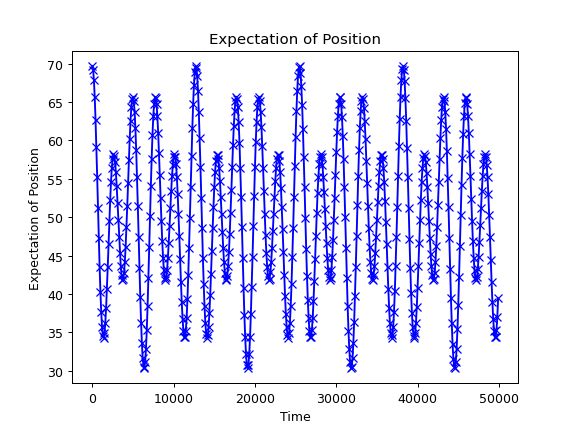

Text(0, 0.5, 'Expectation of Position')

In [115]:
plt.figure()
plt.plot(tr, x_avg, color='b', ls='-', marker='x')
plt.title('Expectation of Position')
plt.xlabel('Time')
plt.ylabel('Expectation of Position')

- (iv) By using the mass of the particle is $9.1*10^{-31}kg$ and the length of the box is 3nm, plot the expectation value of position as a function of time.


In [116]:
eta = 6.63e-34/2/np.pi #Reduced Plank constant in eV.s
m = 9.11e-31   #Assuming the particle mass is equal to a free electron
q = 1.6e-19
L=3e-9
T0=1e-3
dt=1e-6

#t = np.linspace(0,T0,num=N)
#t=0
E1=eta**2/(2*m)*(np.pi/L)**2
E2=eta**2/(2*m)*(2*np.pi/L)**2
E3=eta**2/(2*m)*(3*np.pi/L)**2
An=np.sqrt(2/L)
x0 = 0
x1 = L

x_avg=[]
tr=np.arange(0,T0,dt)
for t in tr: 
    integrand = lambda x : An*(3/(5*np.sqrt(2))*np.exp(1j*E1*t/eta)*np.sin(np.pi/L*x)-3/(5*np.sqrt(2))*np.exp(1j*E2*t/eta)*np.sin(2*np.pi/L*x)+
        4/(5)*np.exp(1j*E3*t/eta)*np.sin(3*np.pi/L*x))*x*An*(3/(5*np.sqrt(2))*np.exp(-1j*E1*t/eta)*np.sin(np.pi/L*x)
        -3/(5*np.sqrt(2))*np.exp(-1j*E2*t/eta)*np.sin(2*np.pi/L*x)+4/(5)*np.exp(-1j*E3*t/eta)*np.sin(3*np.pi/L*x))
    result, error = spi.quad(integrand, x0, x1)
    x_avg=x_avg+[result]

print(x_avg[0])

2.090704289688212e-09


<IPython.core.display.Javascript object>


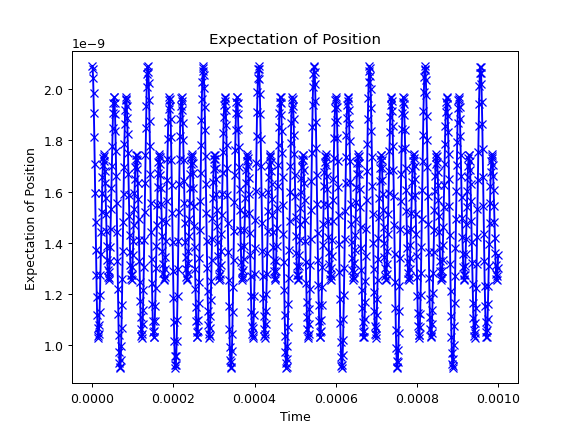

Text(0, 0.5, 'Expectation of Position')

In [117]:
plt.figure()
plt.plot(tr, x_avg, color='b', ls='-', marker='x')
plt.title('Expectation of Position')
plt.xlabel('Time')
plt.ylabel('Expectation of Position')